In [2]:
# Import libraries used for the Project
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import skew, kurtosis

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.feature_selection import SelectFromModel

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
X_train = pd.read_csv("X_train.csv")
X_val = pd.read_csv("X_val.csv")
X_test = pd.read_csv("X_test.csv")

y_train = pd.read_csv("y_train.csv")
y_val = pd.read_csv("y_val.csv")
y_test = pd.read_csv("y_test.csv")

In [4]:
# Choose the number of features
top6_features = ['Rain_mm', 'RH_9am', 'RH_3pm', 'Temp_3pm', 'Max_Temp', 'Temp_9am']

PART 4 - KNN

4.1 - Choose Parameters

In [5]:
# We are going to look at the number of ideal neighbours and the best distance measurment, using the 6 features 
metrics = ["euclidean", "manhattan"]

# Create a dictionary to save results
knn_parameters = {"metric": [],
                  "k_values": [],
                  "Accuracy": []}

for metric in metrics:
    for n in range(3, 60, 2):
        knn = KNeighborsClassifier(n_neighbors=n, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_val)
        knn_parameters["metric"].append(metric)
        knn_parameters["k_values"].append(n)
        knn_parameters["Accuracy"].append(accuracy_score(y_pred, y_val))

c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [6]:
# Convert to Data Frame to see results
knn_parameters = pd.DataFrame(knn_parameters)

([<matplotlib.axis.XTick at 0x24f8ff59a00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  

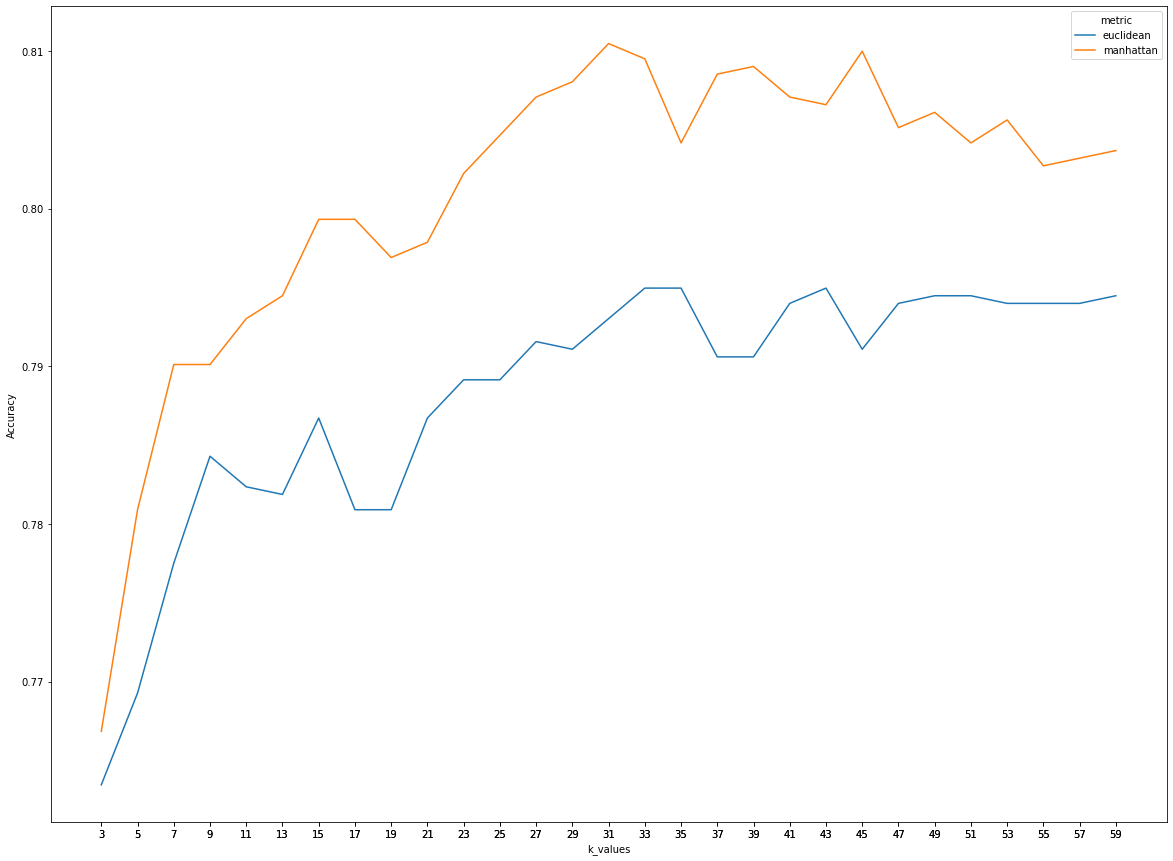

In [7]:
# Visualize the Results
plt.figure(figsize=(20,15))
sns.lineplot(x = knn_parameters["k_values"], y = knn_parameters["Accuracy"], hue = knn_parameters["metric"])
plt.xticks(knn_parameters["k_values"])

4.2 Rethinking Number of Features

In [8]:
# From the intial feature search we saw that only including 2 features generated a greater accuracy, lets test that with the top 6 and general parameters
knn = KNeighborsClassifier()

score = {}
for i in range(2,7):
    knn.fit(X_train[top6_features[:i]], y_train)
    y_pred = knn.predict(X_val[top6_features[:i]])
    score[i] = (accuracy_score(y_pred, y_val))

score

c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

{2: 0.9781871061560834,
 3: 0.827435773145904,
 4: 0.7663596703829375,
 5: 0.7532719340765875,
 6: 0.769268056228793}

In [9]:
# What if we use "RH_3pm"
nn = KNeighborsClassifier()
knn.fit(X_train[["Rain_mm", "RH_3pm"]], y_train)
y_pred = knn.predict(X_val[["Rain_mm", "RH_3pm"]])
accuracy_score(y_pred, y_val)

c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9743092583616093

4.3 Parameter Search for Two Features

In [10]:
# Finne tunning the mode with only top two features 
metrics = ["euclidean", "manhattan"]

# Create a dictionary to save results
knn_parameters = {"metric": [],
                  "k_values": [],
                  "Accuracy": []}

for metric in metrics:
    for n in range(3, 60, 2):
        knn = KNeighborsClassifier(n_neighbors=n, metric=metric)
        knn.fit(X_train[top6_features[:2]], y_train)
        y_pred = knn.predict(X_val[top6_features[:2]])
        knn_parameters["metric"].append(metric)
        knn_parameters["k_values"].append(n)
        knn_parameters["Accuracy"].append(accuracy_score(y_pred, y_val))

c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

([<matplotlib.axis.XTick at 0x24f917797f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  

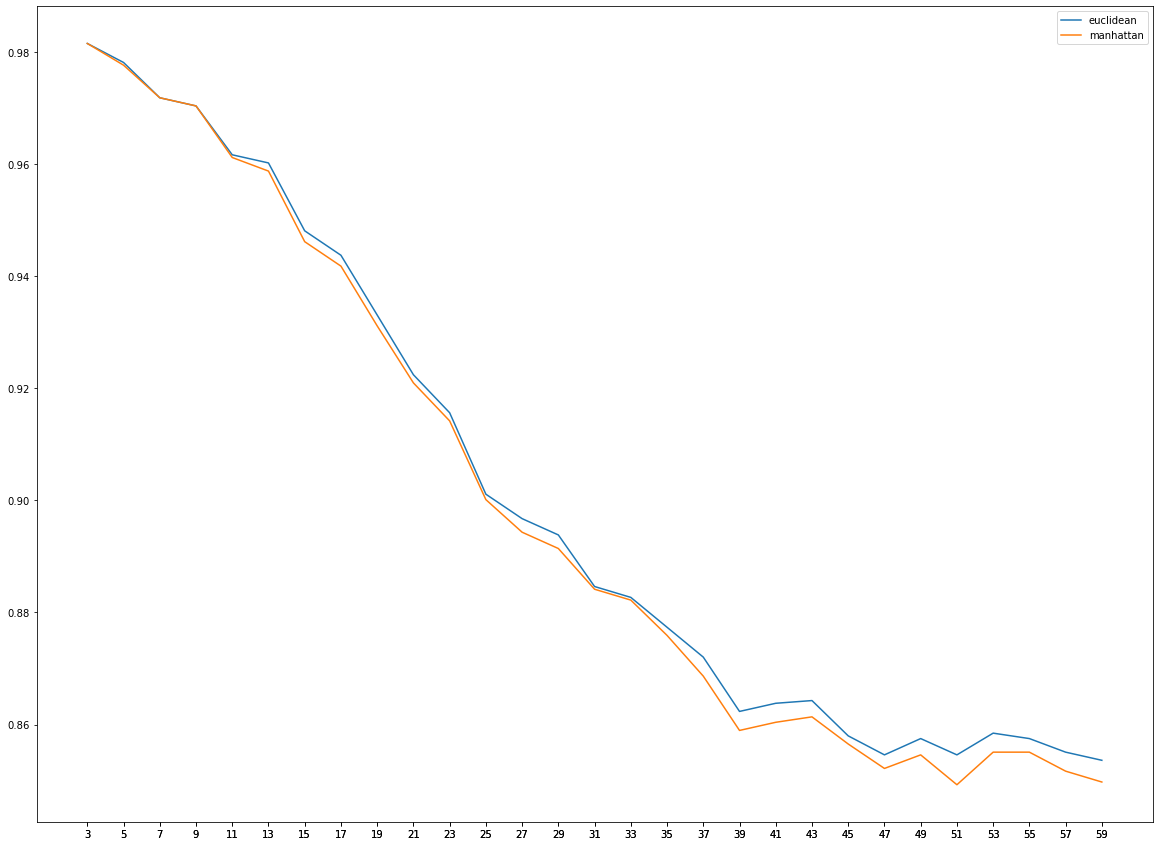

In [11]:
# Visualize the Results
plt.figure(figsize=(20,15))
sns.lineplot(x = knn_parameters["k_values"], y = knn_parameters["Accuracy"], hue = knn_parameters["metric"])
plt.xticks(knn_parameters["k_values"])

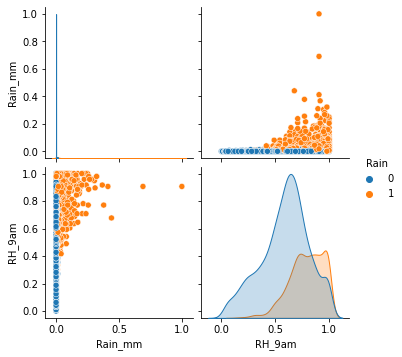

In [12]:
# Visual evidence of why it works with only top 2 features
sns.pairplot(X_train[top6_features[:2]].join(y_train), hue='Rain')

4.4 Testing the Model 

In [13]:
# We found that the best scoring model on the validation is with the top 2 featues, 3 neighbours and any metric will be ok
knn = KNeighborsClassifier()
knn.fit(X_train[top6_features[:2]], y_train)
y_pred = knn.predict(X_test[top6_features[:2]])

print(f"Testing Accuracy: {accuracy_score(y_pred, y_test).round(5) * 100}%")

Testing Accuracy: 97.674%


c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


4.5 Visualising the Result

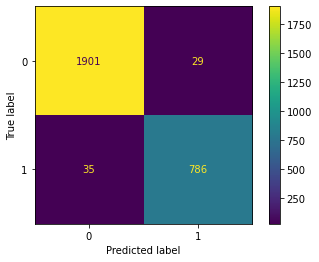

In [14]:
# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix)
disp.plot()

In [15]:
# Classification Report
print(classification_report(y_test, y_pred))

TN = 1901
FN = 35
TP = 786
FP = 29

sen = TP / (TP + FN)
spec = TN / (TN + FP)

(sen + spec)/2

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1930
           1       0.96      0.96      0.96       821

    accuracy                           0.98      2751
   macro avg       0.97      0.97      0.97      2751
weighted avg       0.98      0.98      0.98      2751



0.9711715776918077